In [1]:
%matplotlib inline
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

plt.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings('ignore')

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
# usecols=[1, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 20, 21],
df = pd.read_csv('scrubbed.csv', low_memory=False)
df.head()

Unnamed: 0      Suburb          Address  Rooms Type    Price Method  \
0           2  Abbotsford  25 Bloomburg St      2    h  1035000      S   
1           4  Abbotsford     5 Charles St      3    h  1465000     SP   
2           6  Abbotsford      55a Park St      4    h  1600000     VB   
3          11  Abbotsford     124 Yarra St      3    h  1876000      S   
4          14  Abbotsford    98 Charles St      2    h  1636000      S   

  SellerG     Date  Distance      ...        Bathroom  Car  Landsize  \
0  Biggin   4/2/16       2.5      ...               1    0       156   
1  Biggin   4/3/17       2.5      ...               2    0       134   
2  Nelson   4/6/16       2.5      ...               1    2       120   
3  Nelson   7/5/16       2.5      ...               2    0       245   
4  Nelson  8/10/16       2.5      ...               1    2       256   

   BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
0          79.0       1900        Yarra   -37.8079   144.9934   
1         150.0       1900        Yarra   -37.8093   144.9944   
2         142.0       2014        Yarra   -37.8072   144.9941   
3         210.0       1910        Yarra   -37.8024   144.9993   
4         107.0       1890        Yarra   -37.8060   144.9954   

              Regionname  Propertycount  
0  Northern Metropolitan           4019  
1  Northern Metropolitan           4019  
2  Northern Metropolitan           4019  
3  Northern Metropolitan           4019  
4  Northern Metropolitan           4019  

[5 rows x 22 columns]

In [3]:
# Add age variable
df['Age'] = 2017 - df['YearBuilt']

In [4]:
df.describe()

Unnamed: 0        Rooms         Price     Distance     Postcode  \
count   5180.000000  5180.000000  5.180000e+03  5180.000000  5180.000000   
mean    9772.400965     3.118919  1.156097e+06    10.402027  3101.265444   
std     5855.831819     0.903827  6.916897e+05     5.714450    90.005511   
min        2.000000     1.000000  1.310000e+05     0.000000  3000.000000   
25%     4634.500000     3.000000  7.000000e+05     6.600000  3043.000000   
50%     9709.500000     3.000000  9.600000e+05     9.700000  3079.000000   
75%    14972.750000     4.000000  1.415938e+06    13.000000  3146.000000   
max    19739.000000     8.000000  9.000000e+06    47.400000  3977.000000   

          Bedroom2     Bathroom          Car      Landsize  BuildingArea  \
count  5180.000000  5180.000000  5180.000000   5180.000000   5180.000000   
mean      3.085328     1.640927     1.658880    563.348263    153.114925   
std       0.907190     0.732935     0.969335    954.673029     91.107821   
min       0.000000     1.000000     0.000000      1.000000      1.000000   
25%       3.000000     1.000000     1.000000    247.750000    104.000000   
50%       3.000000     2.000000     2.000000    488.000000    133.000000   
75%       4.000000     2.000000     2.000000    660.000000    180.140000   
max       9.000000     8.000000    10.000000  37000.000000   3112.000000   

         YearBuilt    Lattitude   Longtitude  Propertycount          Age  
count  5180.000000  5180.000000  5180.000000    5180.000000  5180.000000  
mean   1961.325290   -37.804914   144.991528    7254.175869    55.674710  
std      39.091856     0.079407     0.105640    4342.630416    39.091856  
min    1196.000000   -38.164920   144.542370     389.000000    -1.000000  
25%    1930.000000   -37.854110   144.919500    4019.000000    20.000000  
50%    1965.000000   -37.796100   144.998900    6482.000000    52.000000  
75%    1997.000000   -37.751760   145.060575    9264.000000    87.000000  
max    2018.000000   -37.457090   145.526350   21650.000000   821.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 23 columns):
Unnamed: 0       5180 non-null int64
Suburb           5180 non-null object
Address          5180 non-null object
Rooms            5180 non-null int64
Type             5180 non-null object
Price            5180 non-null int64
Method           5180 non-null object
SellerG          5180 non-null object
Date             5180 non-null object
Distance         5180 non-null float64
Postcode         5180 non-null int64
Bedroom2         5180 non-null int64
Bathroom         5180 non-null int64
Car              5180 non-null int64
Landsize         5180 non-null int64
BuildingArea     5180 non-null float64
YearBuilt        5180 non-null int64
CouncilArea      5180 non-null object
Lattitude        5180 non-null float64
Longtitude       5180 non-null float64
Regionname       5180 non-null object
Propertycount    5180 non-null int64
Age              5180 non-null int64
dtypes: float64(4), int64(

In [6]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [7]:
len(df["Date"].unique())/4

12.75

In [8]:
var = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

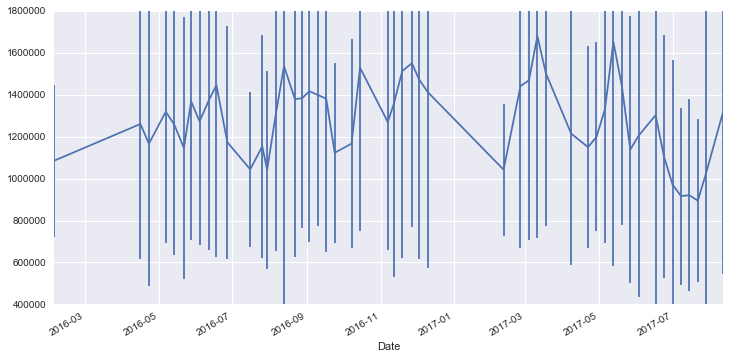

In [9]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1800000))
plt.show()

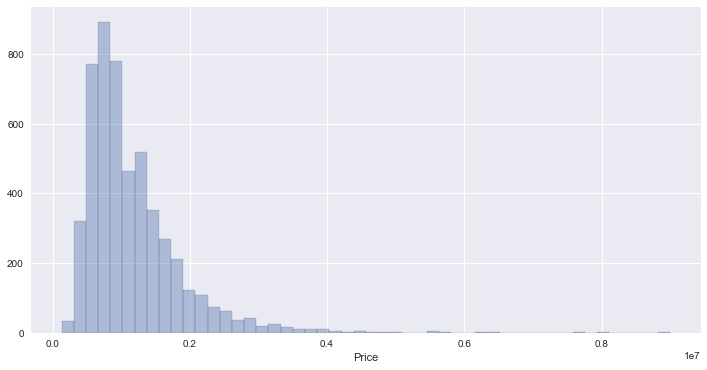

In [10]:
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="k"))
plt.show()

In [11]:
# Identify numeric features
df.select_dtypes(['float64','int64']).columns

Index(['Unnamed: 0', 'Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'Age'],
      dtype='object')

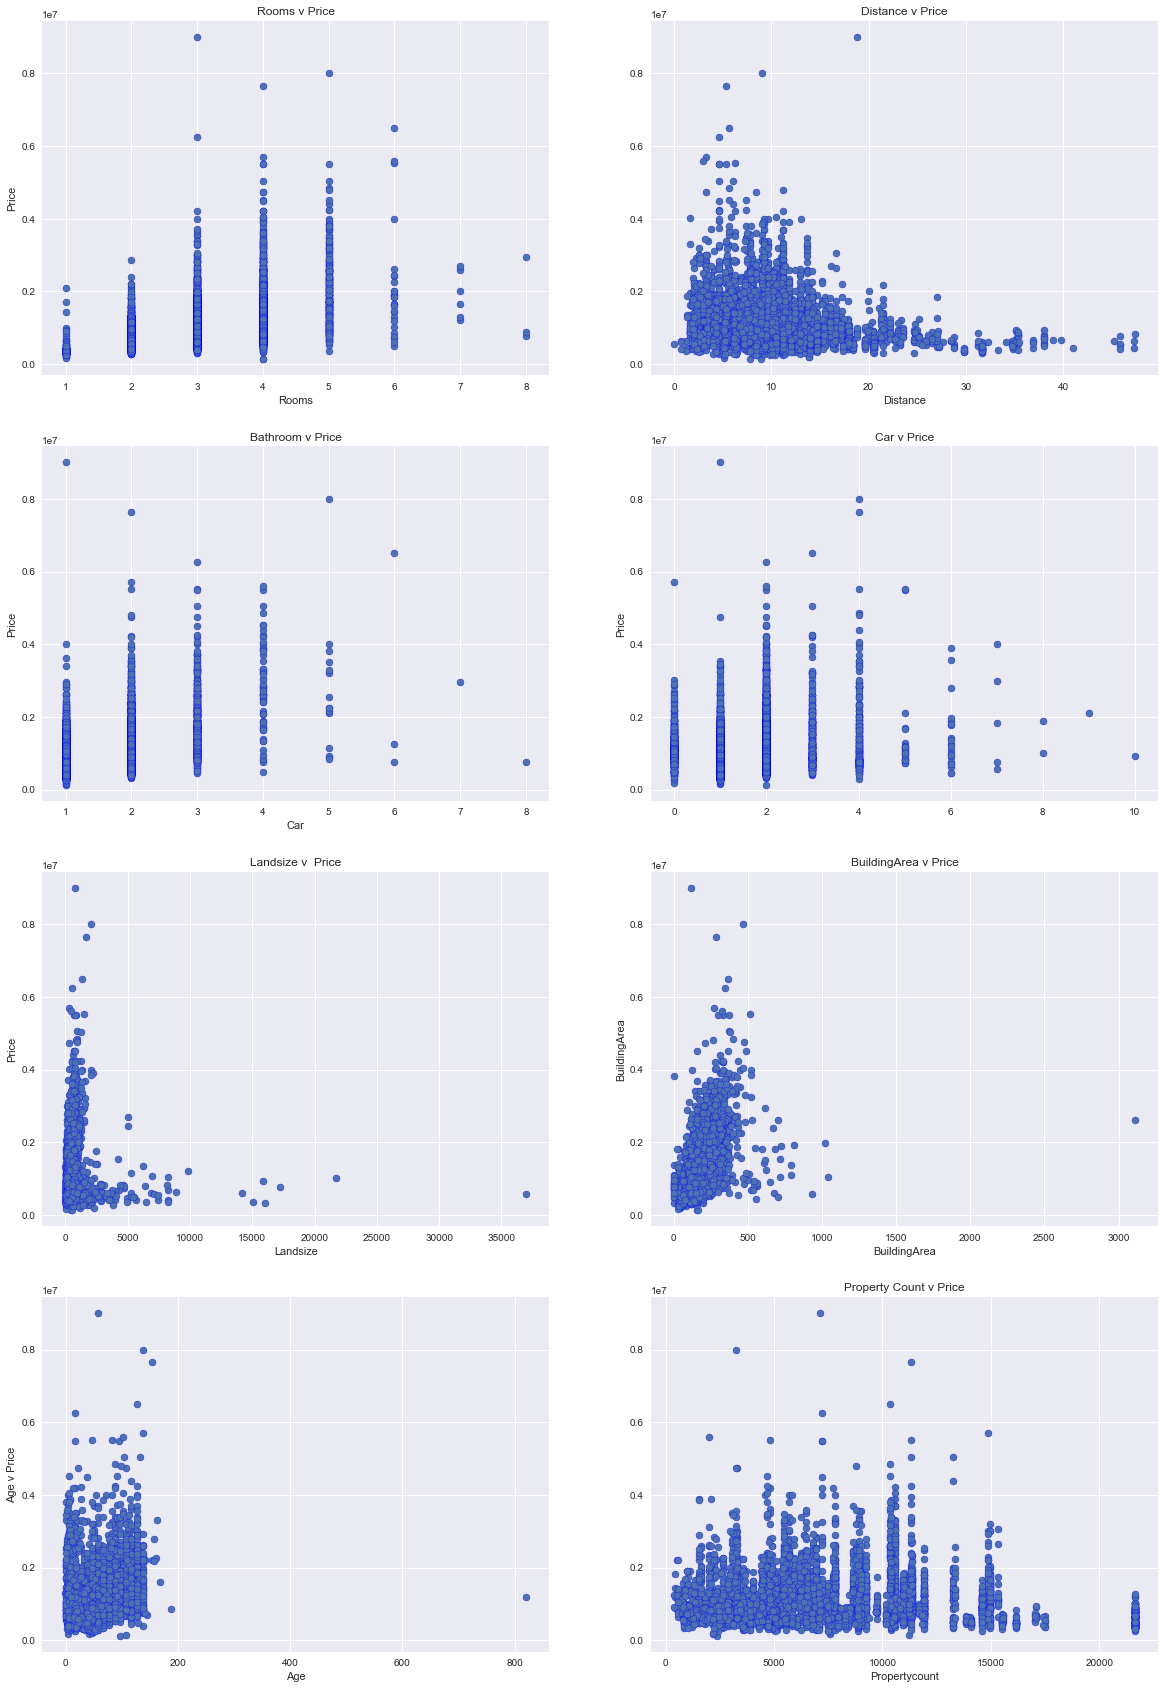

In [12]:
# Suplots of numeric features v price
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

## Correlation

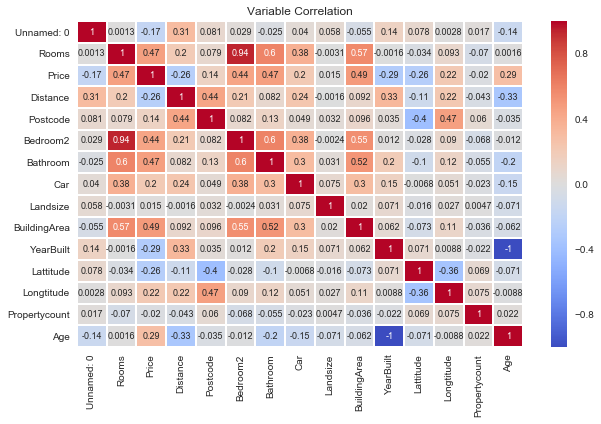

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Weak Positive Correlation 

Age and Price

### Moderate Positive Correlation 

Bathrooms and Price<br/>
Building Area and Price

### Strong Positive Correlation 

Rooms and Price

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.

### Strong Negative Correlation

Age and Price

['YearBuilt',
 'Lattitude',
 'Distance',
 'Car',
 'Longtitude',
 'Age',
 'Bedroom2',
 'Rooms',
 'Bathroom',
 'BuildingArea']

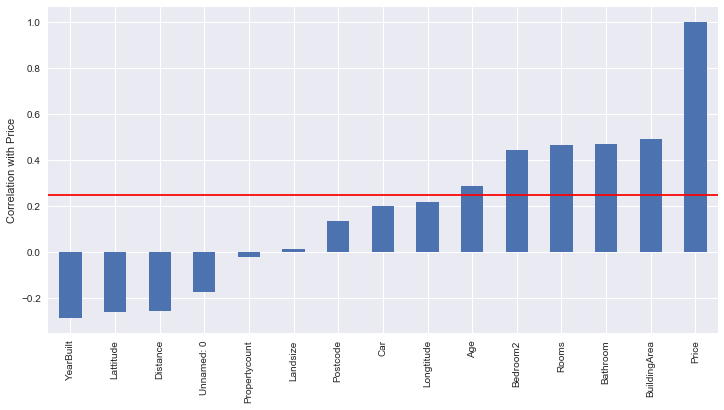

In [14]:
# Generate plot
pd.DataFrame(df.corr().Price.sort_values()).plot.bar(legend=False)
plt.ylabel("Correlation with Price")
plt.hlines(y=0.25, xmin=-10, xmax=100, color="red")

# Select the highly correlated features
highly_corr_features = df.corr().Price.sort_values()
highly_corr_features = highly_corr_features[abs(highly_corr_features) > .2]
highly_corr_features = [f for f in highly_corr_features.index if f != 'Price']
highly_corr_features

I will predict using only the “highly correlated features” (correlation magnitude with sales price above 0.25). They are Distance, Age, Bedroom2, Rooms, Bathroom and BuildingArea.

# Linear Regression

In [15]:
# Split
# Create features variable 
X =df[['Distance', 'Age', 'Bedroom2', 'Rooms', 'Bathroom', 'BuildingArea']]

# Create target variable
y = df['Price']

In [16]:
# from statsmodels.formula.api import ols
# import statsmodels.api as sm
# # Note the swap of X and y
# model = sm.OLS(y, X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state= 0)
# ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# ols.summary()

In [17]:
# print('Parameters: ', results.params)
# print('R2: ', results.rsquared)

In [18]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Compute RMSE on all data
y_pred = linreg.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

489079.25935853325

In [20]:
y_m=np.mean(y)
y_m

1156096.5494208494

In [21]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

489079.25935853325

RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $513283.32 away from the actual value.

In [22]:
rmse/y_m

0.42304361136925733

In [23]:
# # Identify numeric features
# df.select_dtypes(['float64','int64']).columns

## Validation

In [24]:
# divide the data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state= 0)

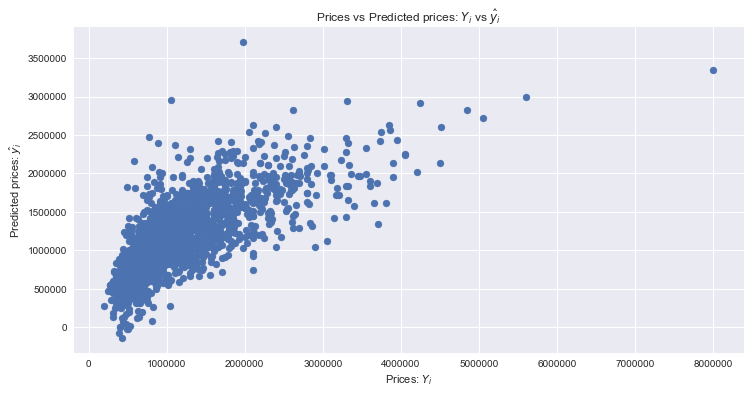

In [25]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [26]:
# # Predict
# # Predicting test set results
# y_pred = linreg.predict(X_test)

In [27]:
print (linreg.intercept_)
print (linreg.coef_)

-8514.62332549
[ -30114.57382817    4761.43763452  -28304.14272712  186514.56325087
  261893.70299157    1873.97008013]


In [28]:
cdf = pd.DataFrame(data = linreg.coef_, index = X.columns, columns = ['Coefficients'])
cdf

Coefficients
Distance      -30114.573828
Age             4761.437635
Bedroom2      -28304.142727
Rooms         186514.563251
Bathroom      261893.702992
BuildingArea    1873.970080

Linear Model: y = -30114x1 + 4761x2 - 28304x3 + 186514x4 + 261893x5 + 1873x6 - 8514 <br/>
x1 - Distance <br/>
x2 - Age <br/>
x3 - Number of bedrooms <br/>
x4 - Number of rooms <br/>
x5 - Number of bathrooms <br/>
x6 - Building size

In [29]:
np.median(y_test)

965000.0

In [30]:
y_m = np.mean(y_test)

## Regression Evaluation Metrics

In [31]:
# Score RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

461503.22276632441

In [32]:
rmse/y_m

0.39907920448612705

In [33]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.539488025334


According to the R-squared, 53.9% of the variance in the dependent variable is explained by the model.

## Analyze the Residuals

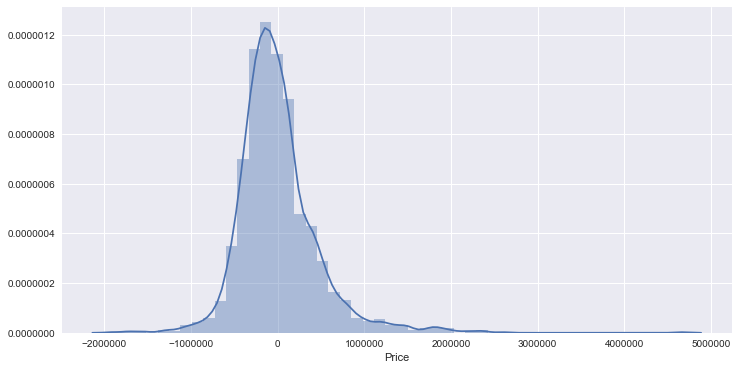

In [34]:
# Histogram of residuals
sns.distplot((y_test - y_pred))

## Compare our testing RMSE with null RMSE

In [35]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null[0:33]

array([ 1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695,
        1156420.1230695,  1156420.1230695,  1156420.1230695])

In [36]:
y_null_rmse =np.sqrt(metrics.mean_squared_error(y_test, y_null))
y_null_rmse

680042.36912735412

In [37]:
y_null_rmse/y_test.mean()

0.58805822863261026

In [38]:
# RMSE using 10-fold cross-validation
kf = KFold(len(X), n_folds=10)

In [39]:
for train,test in kf:
    print (train)
    print (test)

[ 518  519  520 ..., 5177 5178 5179]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [40]:
# evaluate the model using 10-fold cross-validation
scores = []
scores.append(cross_val_score(linreg, X, y, cv=10))
print(scores) 

[array([ 0.51406545,  0.15478704,  0.61873718,  0.55067794,  0.47965436,
        0.47970959,  0.51288165,  0.50074885,  0.38335233,  0.28591215])]


In [41]:
# from sklearn.neighbors import KNeighborsClassifier
# k_range2 = range(1,100)
# k_scores2=[]
# for k in k_range2:
#     kmn = KNeighborsClassifier(n_neighbors=k)
#     loss = -cross_val_score(kmn,X, y,cv=10,scoring='mean_squared_error')
#     k_scores2.append(loss.mean())
# plt.plot(k_range2,k_scores2)
# plt.xlabel("value of k")
# plt.ylabel("cross_validation accuracy")
# plt.show()

In [42]:
# knn2 = KNeighborsClassifier(n_neighbors=84)
# scores2 = cross_val_score(knn2,X,y,cv=10,scoring='accuracy')
# print(scores2)
# print(scores2.mean())

In [43]:
# scores = []
# for train, test in kf:
#     linreg.fit(X[train],y[train])
#     scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
# scores

In [44]:
np.mean(scores)

0.44805265430027569

In [45]:
np.median(scores)

0.4902292199974021

In [46]:
np.std(scores)

0.13018592639465487

In [47]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [48]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 461503.223
RMSE on 5-fold CV: 0.448


## Ridge Regression

In [49]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

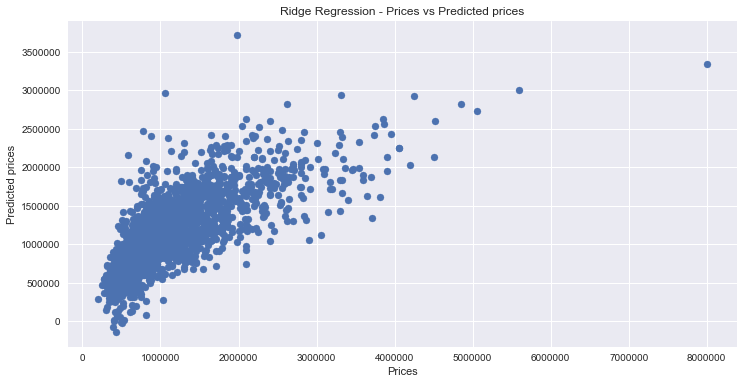

In [50]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Ridge Regression - Prices vs Predicted prices")

In [51]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

461500.29265792831

In [52]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.539493983557


In [53]:
# RMSE using 10-fold cross-validation
scores = []
scores.append(cross_val_score(ridge, X, y, cv=10))
print(scores) 

[array([ 0.51406201,  0.154704  ,  0.61872936,  0.55069452,  0.47964848,
        0.47971557,  0.51288136,  0.50075567,  0.38339216,  0.28592034])]


In [54]:
# scores = []
# for train, test in kf:
#     linreg.fit(X_train, y_train)
#     scores.append(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
# scores

In [55]:
# for train,test in kf:
#     print (train)
#     print (test)

In [56]:
# # kf = KFold(n_splits=5)
# # scores = []
# # for train, test in kf.split(y_test):
# #     linreg.fit(X[test],y[train])
# #     scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
# # scores
# scores = []
# for train, test in kf:
#     linreg.fit(X_test,y_train)
#     scores.append(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
# scores

In [57]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 461500.293
RMSE on 5-fold CV: 0.448


## Lasso Regression

In [58]:
lasso = Lasso(fit_intercept=True, alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

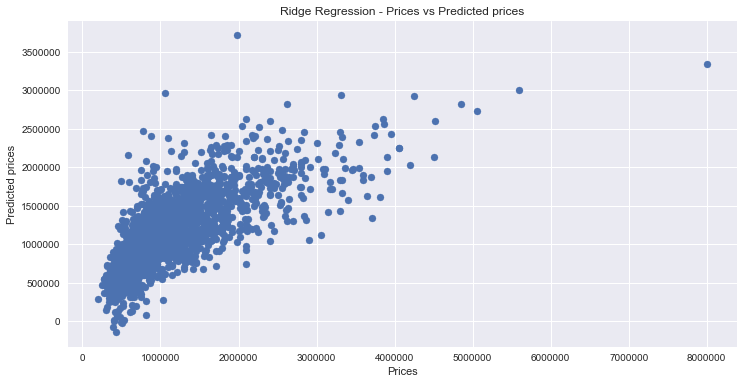

In [59]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Ridge Regression - Prices vs Predicted prices")

In [60]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

461500.29265792831

In [61]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.539493983557


In [62]:
# RMSE using 10-fold cross-validation
scores = []
scores.append(cross_val_score(lasso, X, y, cv=10))
print(scores) 

[array([ 0.51406507,  0.15478482,  0.6187369 ,  0.55067878,  0.47965315,
        0.47970987,  0.5128817 ,  0.50074922,  0.38335298,  0.28591228])]


In [63]:
show_stats('Lasso Regression',rmse ,np.mean(scores))

Method: Lasso Regression
RMSE on no CV training: 461500.293
RMSE on 5-fold CV: 0.448


# Questions About Multivariate Linear Model:

### 1) Is the relationship significant? <br/>
A. Yes, it is. Because the histogram of residuals presents a normal distribution. <br/>
### 2) Are any model assumptions violated?<br/>
A. Yes, there are some model assumptions violated. When I use KFOLD to do cross validation, the scores is [ 0.51406545,  0.15478704,  0.61873718,  0.55067794,  0.47965436, 0.47970959,  0.51288165,  0.50074885,  0.38335233,  0.28591215]. We can see that there are some of these tests are violated. <br/>
### 3) Is there any multi-colinearity in the model?<br/>
A. No, all correlation cofficients are smaller than 0.75.<br/>
### 4) In the multivariate models are predictor variables independent of all the other predictor variables?<br/>
A. No. For example, land size is dependent on the number of rooms.<br/>
### 5) In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.<br/>
A. According to the correlation plot, we can rank these predictors as below:<br/>BuildingArea > Bathroom > Rooms > Bedroom2 > Distance > Age <br/>
### 6) Does the model make sense?<br/>
A. Yes! It can give a reasonable predictive price based on basic feature data. <br/>
### 7) Does regularization help? <br/>
A. No, it doesn't help. The result is almost the same as the one without regularization.

# Logistic Regression

I will add a new feature to this dataset to help predict whether a house's price will be higher than $1,000,000. If higher than $1,000,000, its "Bin" value is set as "1", if not, set as "0".

In [64]:
# Add bin variable
df['Bin'] = df.apply(lambda x: 1, axis=1)
df['Bin'] = list(map(lambda x: 0 if x < 1000000 else (1 if x > 1000000 else 0 ) , df['Price']))

In [65]:
# Select the predictors and target
X = df[['Age', 'Bedroom2', 'Rooms', 'Bathroom', 'BuildingArea']]
y = df['Bin']

In [66]:
price_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.626001
         Iterations 6


In [67]:
price_model.conf_int()

0         1
Age           0.011336  0.014471
Bedroom2     -0.845688 -0.421728
Rooms        -0.507503 -0.079409
Bathroom      0.084398  0.315493
BuildingArea  0.011563  0.014638

In [68]:
np.exp(price_model.params)

Age             1.012987
Bedroom2        0.530621
Rooms           0.745682
Bathroom        1.221336
BuildingArea    1.013187
dtype: float64

In [69]:
params = price_model.params
conf = price_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddRatio']
np.exp(conf)

2.5%     97.5%  OddRatio
Age           1.011401  1.014576  1.012987
Bedroom2      0.429262  0.655912  0.530621
Rooms         0.601997  0.923662  0.745682
Bathroom      1.088062  1.370934  1.221336
BuildingArea  1.011630  1.014746  1.013187

In [70]:
price_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Bin   No. Observations:                 5180
Model:                          Logit   Df Residuals:                     5175
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Oct 2017   Pseudo R-squ.:                 0.09465
Time:                        23:15:56   Log-Likelihood:                -3242.7
converged:                       True   LL-Null:                       -3581.7
                                        LLR p-value:                2.003e-145
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0129      0.001     16.136      0.000       0.011       0.014
Bedroom2        -0.6337      0.108     -5.859      0.000      -0.846      -0.422
Rooms           -0.2935      0.109     -2.687      0.007      -0.508      -0.079
Bathroom         0.1999      0.059      3.392      0.001       0.084       0.315
BuildingArea     0.0131      0.001     16.697      0.000       0.012       0.015
================================================================================
"""

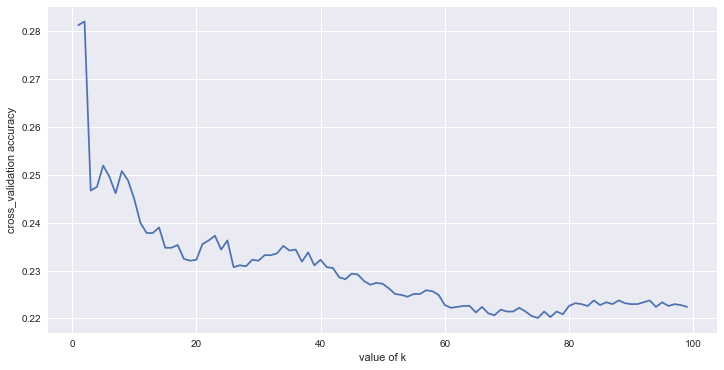

In [71]:
k_range = range(1,100)
k_scores = []
for k in k_range:
    kmn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(kmn, X, y, cv=10, scoring='mean_squared_error')
    k_scores.append(loss.mean())
plt.plot(k_range,k_scores)
plt.xlabel("value of k")
plt.ylabel("cross_validation accuracy")
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors=75)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.78805395  0.77606178  0.79343629  0.7953668   0.77413127  0.8011583
  0.8011583   0.77027027  0.75096525  0.74854932]
0.779915153547


# Questions About Logistic Linear Model:

### 1) Is the relationship significant?<br/>
   Yes, it is. P-value is 2.003e-145, smaller than 0.05. <br/>
### 2) Are any model assumptions violated? <br/>
   No, there isn't any model assumptions violated.
### 3) Cross-validate the model. How well did it do?
   When I use cross validation to validate the model, the scores is [ 0.78805395  0.77606178  0.79343629  0.7953668   0.77413127  0.8011583    0.8011583   0.77027027  0.75096525  0.74854932]. It shows that this logistic model makes sense. The mean score is about 78%. The accuracy to predict whether the price of a house is higher than 1,000,000 is 78%.